# Best Models for Heart Stroke Prediction

Tyson Ditner | 230147201 | ditner@unbc.ca

Noah Stobbe | 230140171 | stobbe@unbc.ca

CPSC499 - Applied Machine Learning

## References

1. Aurélien Géron, "Hands-On Machine Learning with Scikit-Learn & TensorFlow".

2. https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
#from google.colab import files, drive
#import gdown

C:\Users\oah1s\AppData\Local\Temp\ipykernel_15124\1944762516.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Upload a kaggle.json
#files.upload()

from warnings import catch_warnings
file_id = '1DrXop-XopWp_7HxfSDa-lV19iBVBsVVc' # '1CemmlVVZkHVf3Gufln6dFCWeoZ6ZDr0i'

# URL for downloading the file from Google Drive
url = f'https://drive.google.com/file/d/{file_id}' # f'https://drive.google.com/uc?id={file_id}'

# Path to save the downloaded file
file_path = '/content/drive/MyDrive/heart-disease-dataset.zip'
folder_path = '/content/drive'

# Create the path
try:
    os.mkdir(folder_path)
    os.mkdir(folder_path + '/MyDrive')
except OSError as error:
    print(error)

# Download the file
gdown.download(url, file_path, quiet=False)
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/heart-disease-dataset.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive')
zip_ref.close()

raw_data = pd.read_csv(file_path)

"""
dataset = 'heart-disease-dataset'
!rm -r $dataset

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
"""

"""
!kaggle datasets download -d mirzahasnine/heart-disease-dataset
"""

"""
import zipfile
zip_ref = zipfile.ZipFile('/content/heart-disease-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
"""

In [5]:
raw_data = pd.read_csv("data/heart_disease.csv", sep=',')

In [6]:
raw_data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


'education' does not seem like a relevant heart disease predictor. We will drop this column.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='cigsPerDay', ylabel='age'>,
        <Axes: xlabel='totChol', ylabel='age'>,
        <Axes: xlabel='heartRate', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='cigsPerDay'>,
        <Axes: xlabel='cigsPerDay', ylabel='cigsPerDay'>,
        <Axes: xlabel='totChol', ylabel='cigsPerDay'>,
        <Axes: xlabel='heartRate', ylabel='cigsPerDay'>],
       [<Axes: xlabel='age', ylabel='totChol'>,
        <Axes: xlabel='cigsPerDay', ylabel='totChol'>,
        <Axes: xlabel='totChol', ylabel='totChol'>,
        <Axes: xlabel='heartRate', ylabel='totChol'>],
       [<Axes: xlabel='age', ylabel='heartRate'>,
        <Axes: xlabel='cigsPerDay', ylabel='heartRate'>,
        <Axes: xlabel='totChol', ylabel='heartRate'>,
        <Axes: xlabel='heartRate', ylabel='heartRate'>]], dtype=object)

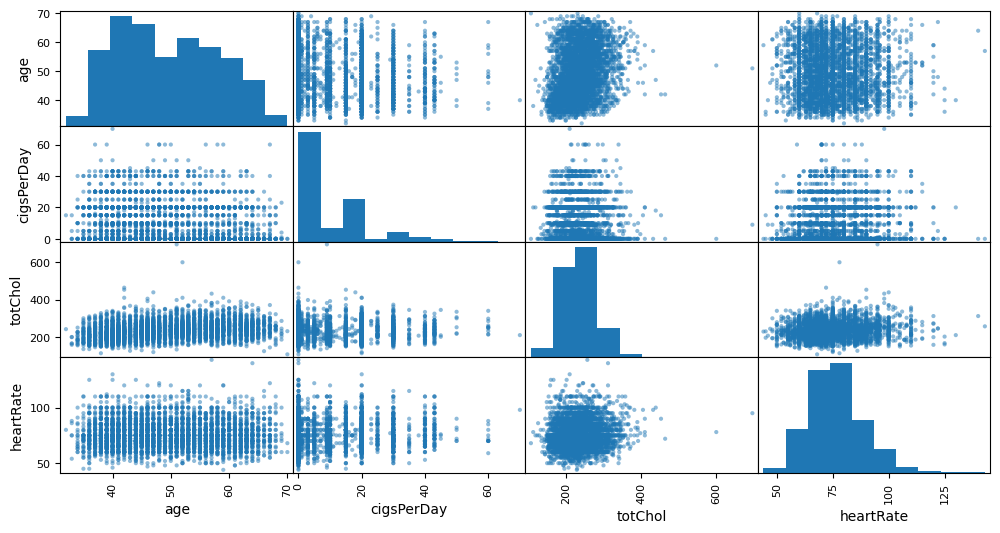

In [7]:
from pandas.plotting import scatter_matrix
attributes_scatter = ["age", "cigsPerDay", "totChol", "heartRate"]
scatter_matrix(raw_data[attributes_scatter], figsize=(12, 6))

Check for null values

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose' contain null values

In [9]:
raw_data.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


## Preprocessing

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Encode non-numerical features numerically

class TransformEncoder(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    # Encode Gender and Geography as matrices with a single 1 per row
    def transform(self, X, y=None):

        one_hot_encoder = OneHotEncoder()

        # Encode "Gender"
        column_names = ["Female", "Male"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['Gender']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['Female'] = X['Female'].astype('int64')
        X['Male'] = X['Male'].astype('int64')

        # Encode "prevalentStroke"
        column_names = ["prevalentStroke", "!prevalentStroke"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['prevalentStroke']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['prevalentStroke'] = X['prevalentStroke'].astype('int64')
        X['!prevalentStroke'] = X['!prevalentStroke'].astype('int64')

        return X

In [11]:
class TransformImputer(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    def transform(self, X, y=None):
        simpleImputer1 = SimpleImputer(strategy="mean") # Strategy: fill null values in with mean values
        simpleImputer2 = SimpleImputer(strategy="most_frequent") # Strategy: majority vote
        X["cigsPerDay"] = simpleImputer1.fit_transform(X[["cigsPerDay"]]) # Fill null 'cigsPerDay' values with mean
        X["BPMeds"] = simpleImputer1.fit_transform(X[["BPMeds"]]) # Fill null 'BPMeds' values with mean
        X["totChol"] = simpleImputer1.fit_transform(X[["totChol"]]) # Fill null 'totChol' values with mean
        X["BMI"] = simpleImputer1.fit_transform(X[["BMI"]]) # Fill null 'BMI' values with mean
        X["heartRate"] = simpleImputer1.fit_transform(X[["heartRate"]]) # Fill null 'heartRate' values with mean
        X["glucose"] = simpleImputer1.fit_transform(X[["glucose"]]) # Fill null 'glucose' values with mean
        return X

In [12]:
class TransformDropper(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        return self
    
    # Drop the specified columns (not rows, hence axis=1):
    def transform(self, X, y=None):
        return X.drop(["education"], axis=1, errors="ignore")